## Energy Consumption Dataset - Linear Regression

This notebook demonstrates a multiple linear regression workflow using a energy consumption from Kaggle. Each step is explained with markdown between code cells.

## Dataset Source

https://www.kaggle.com/datasets/govindaramsriram/energy-consumption-dataset-linear-regression

### Downloading the Dataset

We use `kagglehub` to download the student performance dataset from Kaggle.

**Load Kaggle dataset using KaggleHub** – This block downloads and loads the dataset from Kaggle so we can begin working with it.

In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "train_energy_data.csv"
# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "govindaramsriram/energy-consumption-dataset-linear-regression",
  file_path
)

print("First 5 records:", df.head())

First 5 records:   Building Type  Square Footage  Number of Occupants  Appliances Used  \
0   Residential            7063                   76               10   
1    Commercial           44372                   66               45   
2    Industrial           19255                   37               17   
3   Residential           13265                   14               41   
4    Commercial           13375                   26               18   

   Average Temperature Day of Week  Energy Consumption  
0                29.84     Weekday             2713.95  
1                16.72     Weekday             5744.99  
2                14.30     Weekend             4101.24  
3                32.82     Weekday             3009.14  
4                11.92     Weekday             3279.17  


**Dataset structure overview** – Inspect column names, data types, and memory usage to understand the raw dataset.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


**Statistical summary of numeric features** – Get a quick sense of distributions, outliers, and ranges.

In [3]:
df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1000.000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25462.388,48.372000,25.606000,22.611390,4166.252570
std,14294.554,29.061972,14.105166,7.139943,933.313064
min,560.000,1.000000,1.000000,10.050000,1683.950000
25%,13169.750,22.000000,13.000000,16.475000,3509.482500
50%,25477.000,47.000000,26.000000,22.815000,4175.730000
75%,37446.250,73.250000,38.000000,28.850000,4863.850000
max,49997.000,99.000000,49.000000,34.990000,6530.600000


**Explore unique building types** – Understand categorical values before encoding.

In [4]:
df["Building Type"].drop_duplicates().tolist()

['Residential', 'Commercial', 'Industrial']

**Inspect unique values in Day of Week** – Check categorical class distribution.

In [5]:
df["Day of Week"].drop_duplicates().tolist()

['Weekday', 'Weekend']

**Set up visualization libraries** – Import necessary libraries for visual exploration.

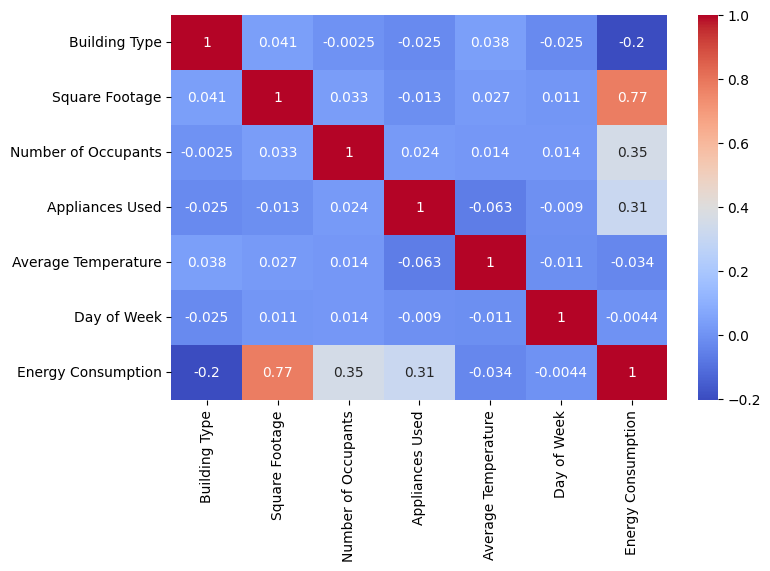

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_encoded = df.copy()
df_encoded["Building Type"] = df_encoded["Building Type"].astype('category').cat.codes
df_encoded["Day of Week"] = df_encoded["Day of Week"].astype('category').cat.codes

plt.figure(figsize=(8,5))
sns.heatmap(pd.DataFrame(df_encoded).corr(), annot=True, cmap="coolwarm")
plt.show()

**Relationship between Square Footage and Energy Consumption** – Checking correlation visually.

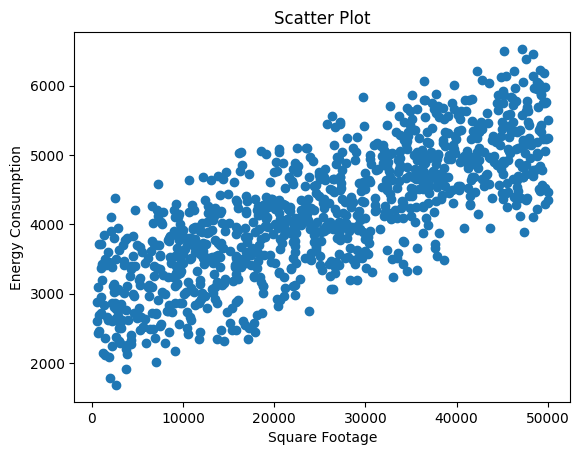

In [7]:
plt.scatter(df["Square Footage"], df["Energy Consumption"])
plt.xlabel("Square Footage")
plt.ylabel("Energy Consumption")
plt.title("Scatter Plot")
plt.show()

*This cell appears empty — consider removing it.*

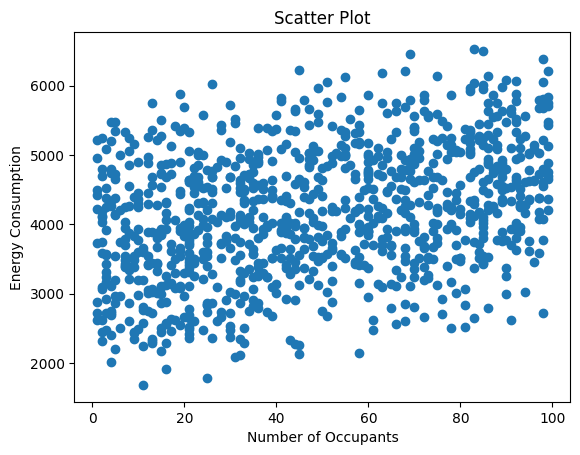

In [8]:
	
plt.scatter(df["Number of Occupants"], df["Energy Consumption"])
plt.xlabel("Number of Occupants")
plt.ylabel("Energy Consumption")
plt.title("Scatter Plot")
plt.show()

**Correlation between number of appliances and energy usage** – Checking linearity.

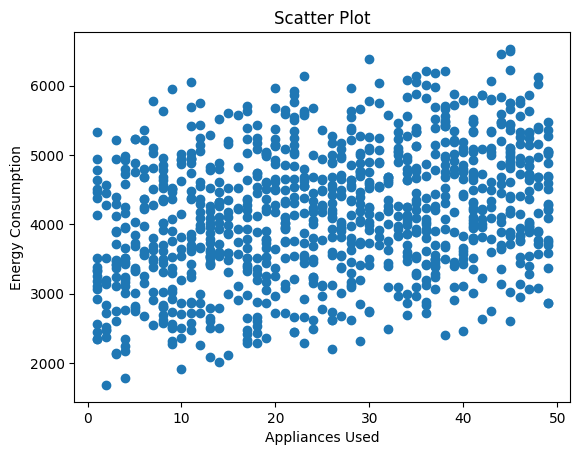

In [9]:
plt.scatter(df["Appliances Used"], df["Energy Consumption"])
plt.xlabel("Appliances Used")
plt.ylabel("Energy Consumption")
plt.title("Scatter Plot")
plt.show()

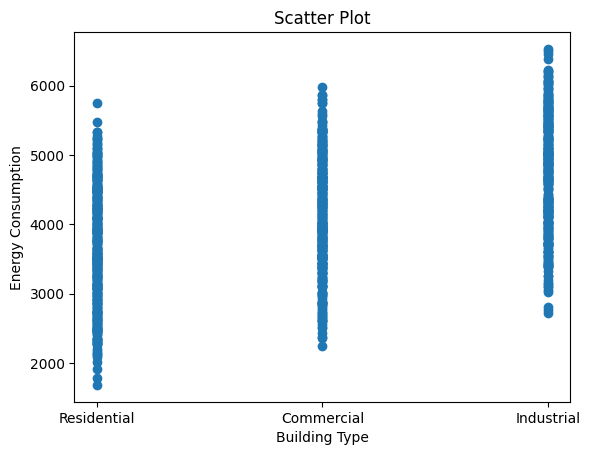

In [10]:

plt.scatter(df["Building Type"], df["Energy Consumption"])
plt.xlabel("Building Type")
plt.ylabel("Energy Consumption")
plt.title("Scatter Plot")
plt.show()

**Prepare testing dataset** – Load/clean test data before validation.

In [11]:
# import testing data
test_df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "govindaramsriram/energy-consumption-dataset-linear-regression",
  "test_energy_data.csv"
)
test_df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


**Categorical Feature Encoding** – Import tools for converting non-numeric data.

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X_train = df.drop("Energy Consumption", axis=1)
y_train = df["Energy Consumption"]

X_test = test_df.drop("Energy Consumption", axis=1)
y_test = test_df["Energy Consumption"]

cat_features = ["Building Type", "Day of Week"]
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat_features)
    ],
    remainder='passthrough'
)


X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

**Train Linear Regression using all features** – Baseline model to compare against subset models.

In [13]:
# All features Liner Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)

model_all = LinearRegression()
model_all.fit(X_train_scaled, y_train)

# Evaluate on test data
X_test_scaled = scaler.transform(X_test_processed)
print("Test R^2 Score (All Features):", model_all.score(X_test_scaled, y_test))



Test R^2 Score (All Features): 0.9999999997063025


**Train model with selected features only** – Compare results against full-feature model.

In [14]:
# Skip features Liner Regression Model

X_train_skip = df[["Square Footage", "Number of Occupants", "Appliances Used"]]
X_test_skip = test_df[["Square Footage", "Number of Occupants", "Appliances Used"]]

X_train_skip_scaled = scaler.fit_transform(X_train_skip)
model_skip = LinearRegression()

model_skip.fit(X_train_skip_scaled, y_train)
# evaluate on test data
X_test_skip_scaled = scaler.transform(X_test_skip)
print("Test R^2 Score (Skip Categorical Features):", model_skip.score(X_test_skip_scaled, y_test))

Test R^2 Score (Skip Categorical Features): 0.7295395757738176


**Model evaluation setup** – Import metrics to evaluate regression performance.

In [15]:
from sklearn.metrics import r2_score

def eval_model(model, X_tr, y_tr, X_te, y_te, name=""):
    y_tr_pred = model.predict(X_tr)
    y_te_pred = model.predict(X_te)
    print(f"{name} - Train R2: {r2_score(y_tr, y_tr_pred):.3f}, Test R2: {r2_score(y_te, y_te_pred):.3f}")

# model_all on all scaled features
eval_model(model_all, X_train_scaled, y_train, X_test_scaled, y_test, "All features")

# same for skipped-features model once you build it
eval_model(model_skip, X_train_skip_scaled, y_train, X_test_skip_scaled, y_test, "Skipped categorical features")

All features - Train R2: 1.000, Test R2: 1.000
Skipped categorical features - Train R2: 0.808, Test R2: 0.730


**Regularized regression models** – Import Ridge and Lasso to compare with Linear Regression.

In [16]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

Lasso = Lasso(alpha=0.1)
Lasso.fit(X_train_scaled, y_train)

eval_model(ridge, X_train_scaled, y_train, X_test_scaled, y_test, "Ridge Regression")
eval_model(Lasso, X_train_scaled, y_train, X_test_scaled, y_test, "Lasso Regression")

Ridge Regression - Train R2: 1.000, Test R2: 1.000
Lasso Regression - Train R2: 1.000, Test R2: 1.000


**Prediction step** – Apply trained models to datasets and evaluate.

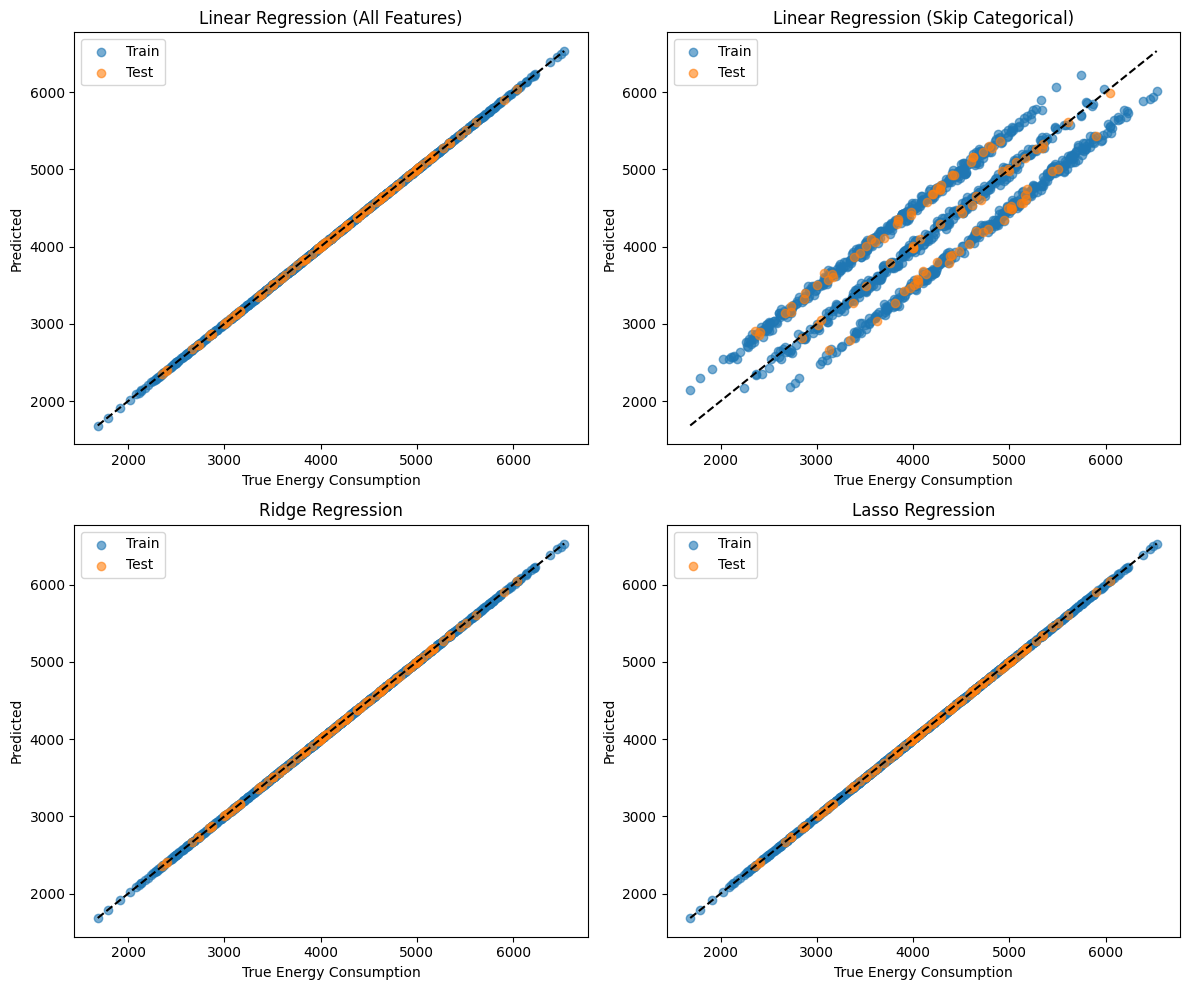

In [17]:
# Predict on train and test for each model
y_train_pred_all = model_all.predict(X_train_scaled)
y_test_pred_all = model_all.predict(X_test_scaled)

y_train_pred_skip = model_skip.predict(X_train_skip_scaled)
y_test_pred_skip = model_skip.predict(X_test_skip_scaled)

y_train_pred_ridge = ridge.predict(X_train_scaled)
y_test_pred_ridge = ridge.predict(X_test_scaled)

y_train_pred_lasso = Lasso.predict(X_train_scaled)
y_test_pred_lasso = Lasso.predict(X_test_scaled)

plt.figure(figsize=(12, 10))

# model_all
plt.subplot(2, 2, 1)
plt.scatter(y_train, y_train_pred_all, label='Train', alpha=0.6)
plt.scatter(y_test, y_test_pred_all, label='Test', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.title('Linear Regression (All Features)')
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted')
plt.legend()

# model_skip
plt.subplot(2, 2, 2)
plt.scatter(y_train, y_train_pred_skip, label='Train', alpha=0.6)
plt.scatter(y_test, y_test_pred_skip, label='Test', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.title('Linear Regression (Skip Categorical)')
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted')
plt.legend()

# Ridge
plt.subplot(2, 2, 3)
plt.scatter(y_train, y_train_pred_ridge, label='Train', alpha=0.6)
plt.scatter(y_test, y_test_pred_ridge, label='Test', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.title('Ridge Regression')
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted')
plt.legend()

# Lasso
plt.subplot(2, 2, 4)
plt.scatter(y_train, y_train_pred_lasso, label='Train', alpha=0.6)
plt.scatter(y_test, y_test_pred_lasso, label='Test', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.title('Lasso Regression')
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted')
plt.legend()

plt.tight_layout()
plt.show()